<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment11/Session11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from training import *
from torchsummary import summary

# getting the data
trainloader, testloader, testData, classes = getData()



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model11().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


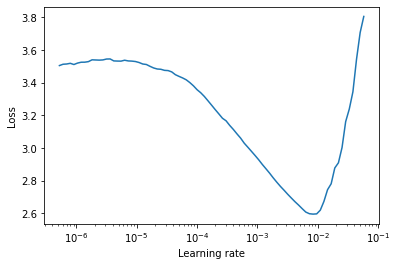

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=0.1, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(24,model,device, trainloader, testloader )


  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.905728340148926 Batch_id=99 Accuracy=11.92: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 2.6791, Accuracy: 1647/10000 (16.47%)

EPOCH: 1


Loss=2.229093074798584 Batch_id=99 Accuracy=18.73: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 2.1643, Accuracy: 2485/10000 (24.85%)

EPOCH: 2


Loss=2.339111566543579 Batch_id=99 Accuracy=25.73: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 3.4726, Accuracy: 2755/10000 (27.55%)

EPOCH: 3


Loss=2.184767961502075 Batch_id=99 Accuracy=30.59: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.9097, Accuracy: 3967/10000 (39.67%)

EPOCH: 4


Loss=1.7418891191482544 Batch_id=99 Accuracy=38.73: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.6191, Accuracy: 4552/10000 (45.52%)

EPOCH: 5


Loss=1.5162112712860107 Batch_id=99 Accuracy=43.98: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.4229, Accuracy: 4938/10000 (49.38%)

EPOCH: 6


Loss=1.5677380561828613 Batch_id=99 Accuracy=49.18: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.3765, Accuracy: 5272/10000 (52.72%)

EPOCH: 7


Loss=1.095505714416504 Batch_id=99 Accuracy=54.54: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.2494, Accuracy: 5985/10000 (59.85%)

EPOCH: 8


  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.1864, Accuracy: 6475/10000 (64.75%)

EPOCH: 9


Loss=0.901857316493988 Batch_id=99 Accuracy=65.32: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.0291, Accuracy: 6727/10000 (67.27%)

EPOCH: 10


Loss=0.7706626057624817 Batch_id=99 Accuracy=68.39: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 1.0352, Accuracy: 6836/10000 (68.36%)

EPOCH: 11


Loss=0.7633407115936279 Batch_id=99 Accuracy=72.74: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.9095, Accuracy: 6981/10000 (69.81%)

EPOCH: 12


Loss=0.6184543371200562 Batch_id=99 Accuracy=75.59: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.8076, Accuracy: 7382/10000 (73.82%)

EPOCH: 13


Loss=0.5523906946182251 Batch_id=99 Accuracy=77.90: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.7536, Accuracy: 7432/10000 (74.32%)

EPOCH: 14


Loss=0.5555726289749146 Batch_id=99 Accuracy=80.70: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6199, Accuracy: 7882/10000 (78.82%)

EPOCH: 15


Loss=0.5619086623191833 Batch_id=99 Accuracy=82.84: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6314, Accuracy: 7878/10000 (78.78%)

EPOCH: 16


Loss=0.48579660058021545 Batch_id=99 Accuracy=84.21: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6367, Accuracy: 7889/10000 (78.89%)

EPOCH: 17


Loss=0.4292513430118561 Batch_id=99 Accuracy=86.41: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.6134, Accuracy: 8000/10000 (80.00%)

EPOCH: 18


Loss=0.35348623991012573 Batch_id=99 Accuracy=87.61: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5955, Accuracy: 8131/10000 (81.31%)

EPOCH: 19


Loss=0.35695987939834595 Batch_id=99 Accuracy=89.25: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5461, Accuracy: 8210/10000 (82.10%)

EPOCH: 20


Loss=0.29119834303855896 Batch_id=99 Accuracy=90.74: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5468, Accuracy: 8279/10000 (82.79%)

EPOCH: 21


Loss=0.21845048666000366 Batch_id=99 Accuracy=92.36: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5681, Accuracy: 8277/10000 (82.77%)

EPOCH: 22


Loss=0.2207091748714447 Batch_id=99 Accuracy=92.87: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]
  0%|          | 0/100 [00:00<?, ?it/s]


Test set: Average loss: 0.5431, Accuracy: 8309/10000 (83.09%)

EPOCH: 23


Loss=0.1545550525188446 Batch_id=99 Accuracy=94.42: 100%|██████████| 100/100 [01:34<00:00,  1.06it/s]



Test set: Average loss: 0.5025, Accuracy: 8434/10000 (84.34%)



In [6]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 95 %
Accuracy of   car : 100 %
Accuracy of  bird : 68 %
Accuracy of   cat : 74 %
Accuracy of  deer : 77 %
Accuracy of   dog : 68 %
Accuracy of  frog : 90 %
Accuracy of horse : 87 %
Accuracy of  ship : 91 %
Accuracy of truck : 89 %


In [0]:

#MissClassifedImage(testData,model,device,3,classes)

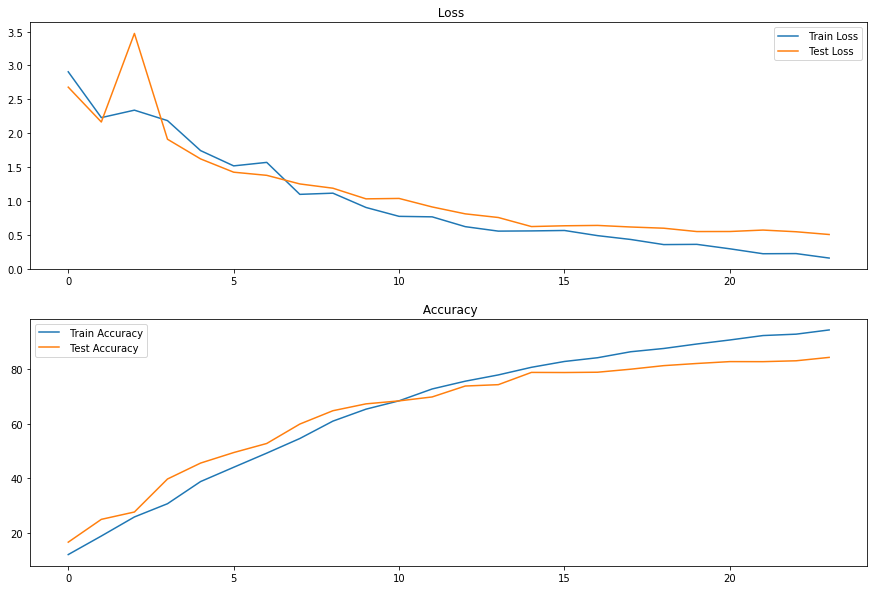

In [17]:
plotPerformanceGraph( )

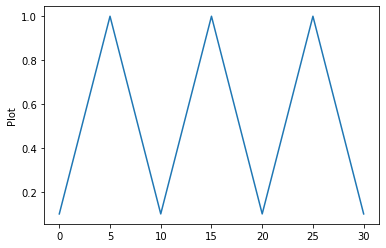

In [24]:
import matplotlib.pyplot as plt

def OneCyclePolicy(LRmax, step, iterations):
    LRmin = LRmax/10;
    LRvalues =[]
    for x in range(0,iterations+1):
        cycle = int(1+ (x/(2*step)))
        a = abs((x/step)-(2*cycle)+1)
        LRt = LRmin + ((LRmax-LRmin)*(1-a))
        LRvalues.append(LRt)
    return LRvalues
val = OneCyclePolicy(1,5,30)
plt.plot(val)
plt.ylabel('Plot')
plt.show()




[0.0032500000000000003, 0.0055000000000000005, 0.007750000000000001, 0.010000000000000002, 0.012250000000000002, 0.011903846153846155, 0.011557692307692309, 0.011211538461538462, 0.010865384615384615, 0.010519230769230769, 0.010173076923076922, 0.009826923076923075, 0.009480769230769228, 0.009134615384615382, 0.008788461538461535, 0.008442307692307688, 0.008096153846153841, 0.007749999999999996, 0.00740384615384615, 0.007057692307692304, 0.006711538461538458, 0.006365384615384612, 0.006019230769230766, 0.0056730769230769204, 0.005326923076923075, 0.004980769230769229, 0.004634615384615383, 0.004288461538461537, 0.003942307692307691, 0.003596153846153845]


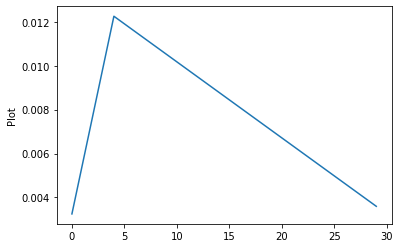

In [62]:
def OneCyclePolicy(LRmax, step, iterations):
    LRmin = LRmax/10;
    LRt = LRmin
    LRvalues =[]
    for x in range(iterations):
        if (x<=step):
          LRt += (LRmax - LRmin)/step
          LRvalues.append(LRt)
        else:
          LRt -= (LRmax - LRmin)/(iterations-step)
          LRvalues.append(LRt)
    return LRvalues
val = OneCyclePolicy(.01,4,30)
print(val)
plt.plot(val)
plt.ylabel('Plot')
plt.show()